# HR Analytics Project- Understanding the Attrition in HR

# Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

 

In [127]:
#importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [128]:
#Loading the Dataset with Pandas:
# Reading the csv file from dataset
df = pd.read_csv(r'C:\Users\admin\Desktop\Attrition in HR.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [129]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [130]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [131]:
df.columns.value_counts().sum()

35

In [132]:
# Checking the dimension of the dataset
df.shape

(1470, 35)

In [133]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [134]:
# Checking the types of the dataset
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [135]:
#Checking null values in the Dataset:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot:>

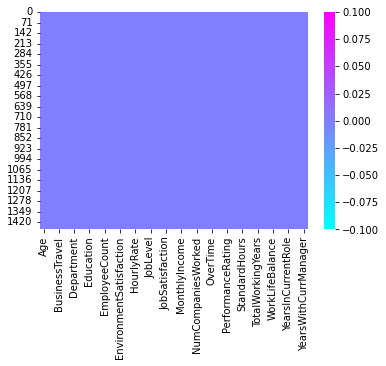

In [136]:
#checking the null values Using heatmap:
sns.heatmap(df.isnull(), cmap='cool')

In [137]:
 #Checking for unique elements in each of the columns 
 df.nunique() 

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

target variable attrition has 2 unique values

In [138]:
df.loc[:, df.nunique() == 1]

,EmployeeCount,Over18,StandardHours
0,1,Y,80
1,1,Y,80
2,1,Y,80
3,1,Y,80
4,1,Y,80
...,...,...,...
1465,1,Y,80
1466,1,Y,80
1467,1,Y,80
1468,1,Y,80


# Exploration of Data & Visualization:

# Univariate Analysis

In [139]:
df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

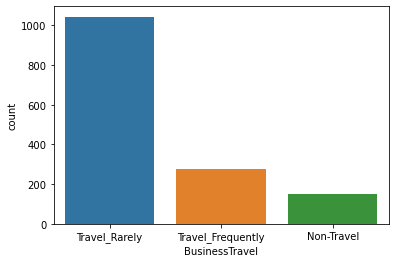

In [140]:
sns.countplot(df['BusinessTravel'])


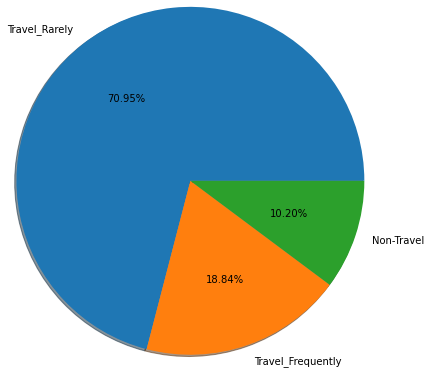

In [141]:
labels = 'Travel_Rarely','Travel_Frequently ','Non-Travel '
fig, ax = plt.subplots()
ax.pie(df['BusinessTravel'].value_counts(),labels = labels,radius =2,autopct = '%1.2f%%', shadow=True)
plt.show()

In [142]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

<AxesSubplot:xlabel='Department', ylabel='count'>

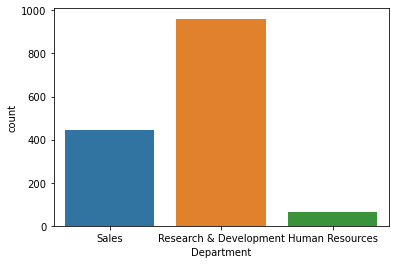

In [143]:
sns.countplot(df['Department'])

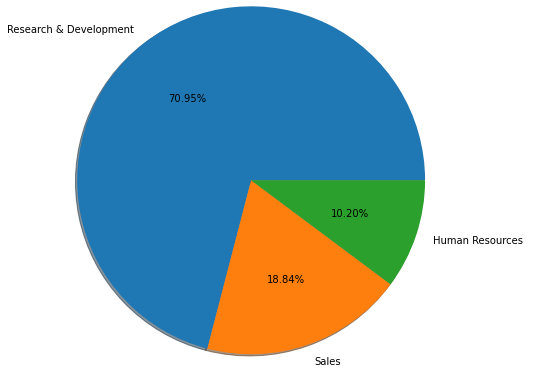

In [144]:
labels = 'Research & Development','Sales','Human Resources  '
fig, ax = plt.subplots()
ax.pie(df['BusinessTravel'].value_counts(),labels = labels,radius =2,autopct = '%1.2f%%', shadow=True)
plt.show()

In [145]:
df['DistanceFromHome'].value_counts()

2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
15     26
18     26
26     25
25     25
20     25
28     23
19     22
14     21
12     20
17     20
22     19
13     19
21     18
27     12
Name: DistanceFromHome, dtype: int64

<AxesSubplot:xlabel='DistanceFromHome', ylabel='count'>

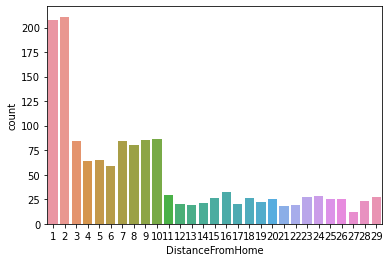

In [146]:
sns.countplot(df['DistanceFromHome'])

<AxesSubplot:xlabel='DistanceFromHome', ylabel='count'>

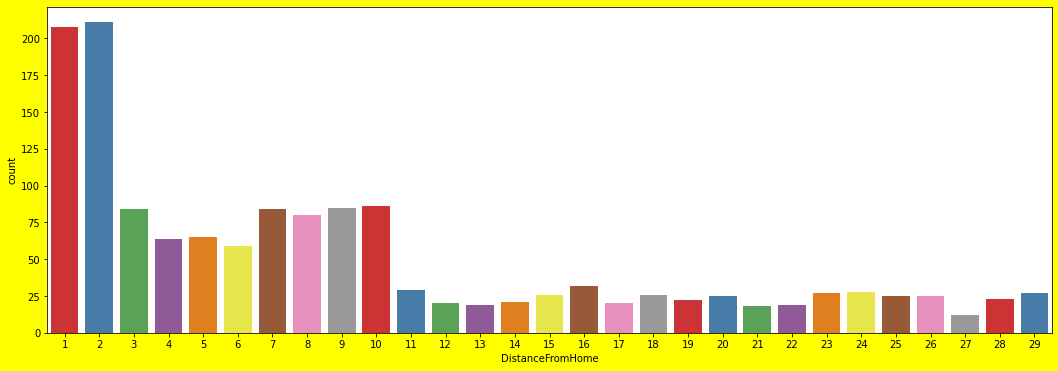

In [147]:
plt.figure(figsize=(18,6),facecolor='yellow')
sns.countplot(df['DistanceFromHome'], palette="Set1")

In [148]:
df['Education'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

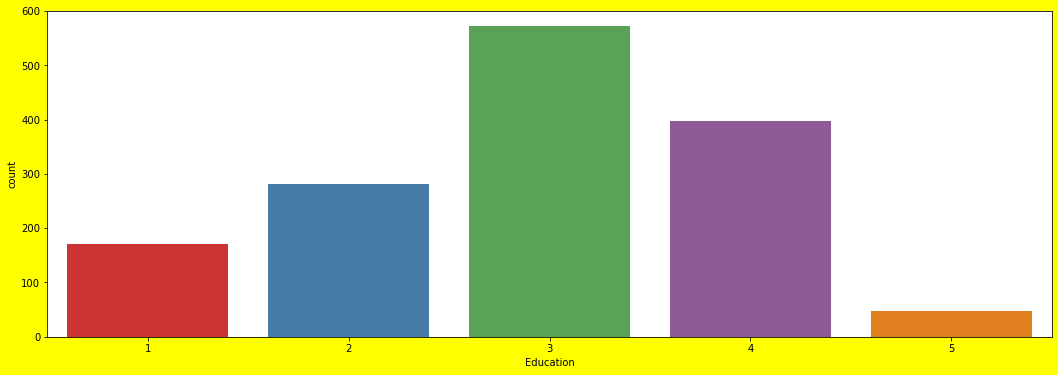

In [149]:
plt.figure(figsize=(18,6),facecolor='yellow')
sns.countplot(df['Education'], palette="Set1")

In [150]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

<AxesSubplot:xlabel='EducationField', ylabel='count'>

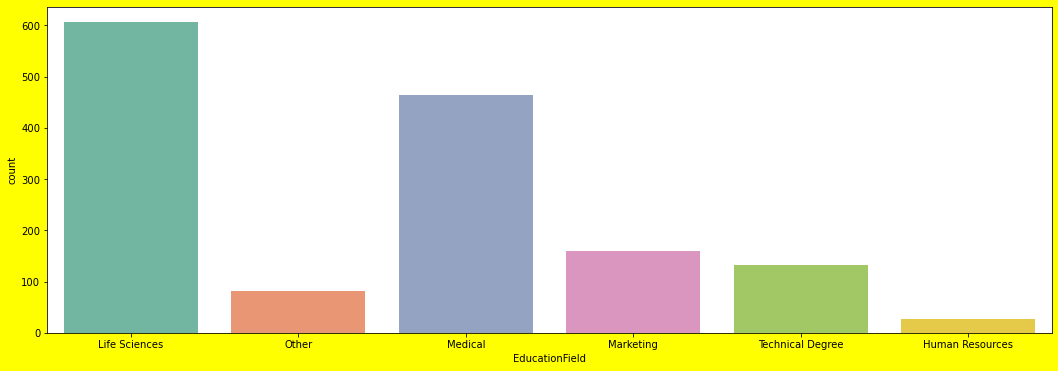

In [151]:
plt.figure(figsize=(18,6),facecolor='yellow')
sns.countplot(df['EducationField'], palette="Set2")

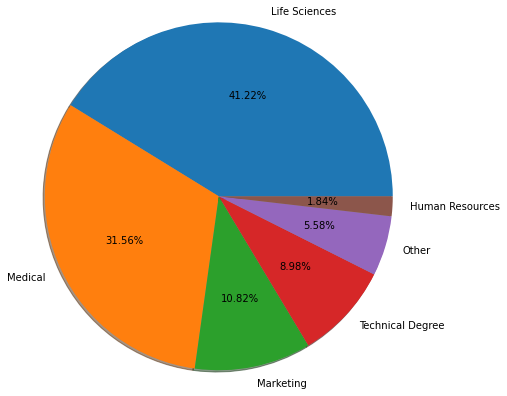

In [152]:
labels = 'Life Sciences ','Medical','Marketing ','Technical Degree','Other','Human Resources'

fig, ax = plt.subplots()
ax.pie(df['EducationField'].value_counts(),labels = labels,radius =2,autopct = '%1.2f%%', shadow=True)
plt.show()

In [153]:
df['Attrition'].unique() 

array(['Yes', 'No'], dtype=object)

In [154]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

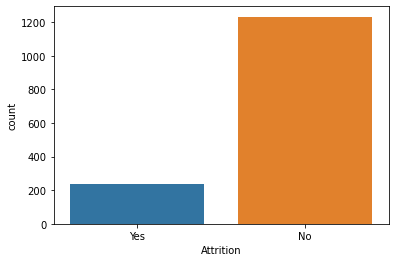

In [155]:
sns.countplot(df['Attrition'])

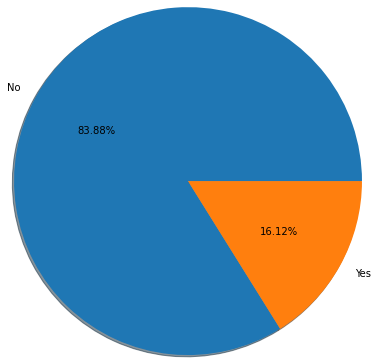

In [156]:
labels = 'No','Yes'
fig, ax = plt.subplots()
ax.pie(df['Attrition'].value_counts(),labels = labels,radius =2,autopct = '%1.2f%%', shadow=True)
plt.show()

# Bivariate and Multivariate Analysis

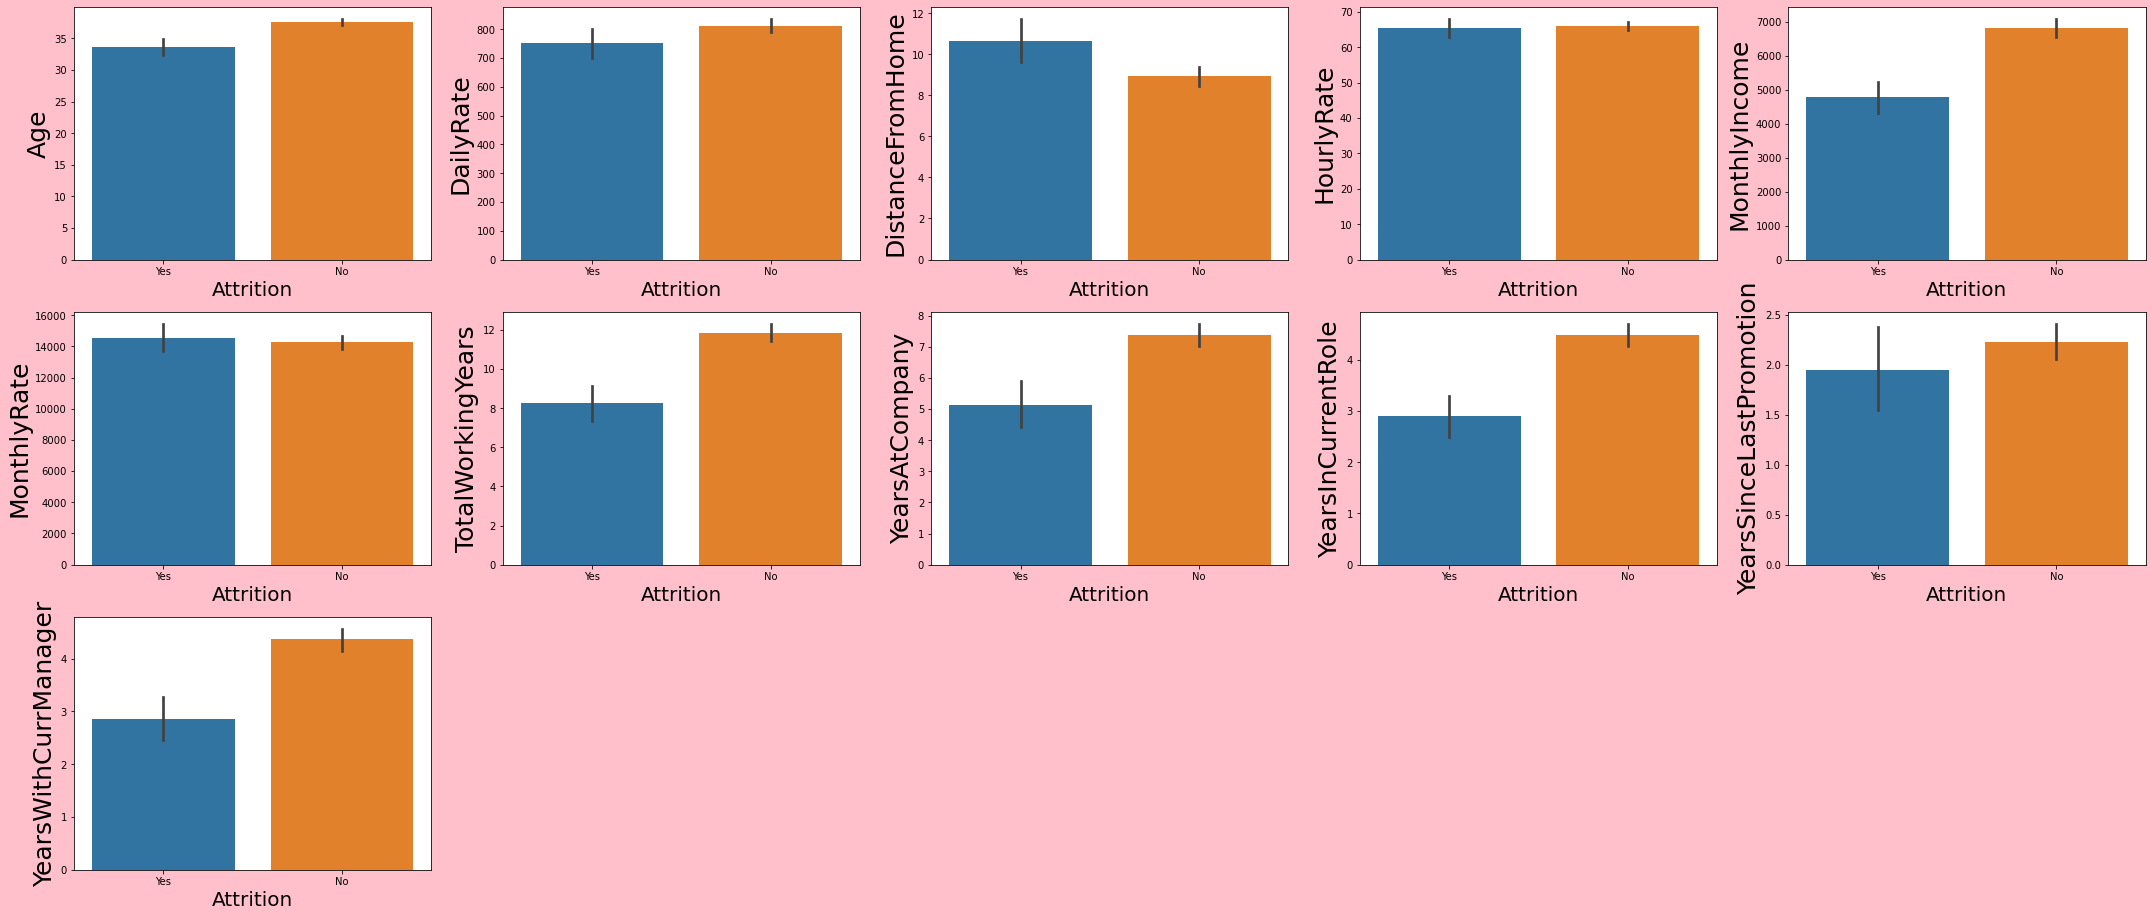

In [157]:
#interpreting Relationship between Dependent Variable and Independent Variables
plt.figure(figsize=(30,25),facecolor='pink')
plotnum=1
y = df['Attrition']
X = df[['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]
for col in X:
    if plotnum<=15:
        plt.subplot(6,5,plotnum)
        sns.barplot(y,X[col])
        plt.xlabel('Attrition',fontsize=20)
        plt.ylabel(col,fontsize=25)
    plotnum+=1
plt.tight_layout()

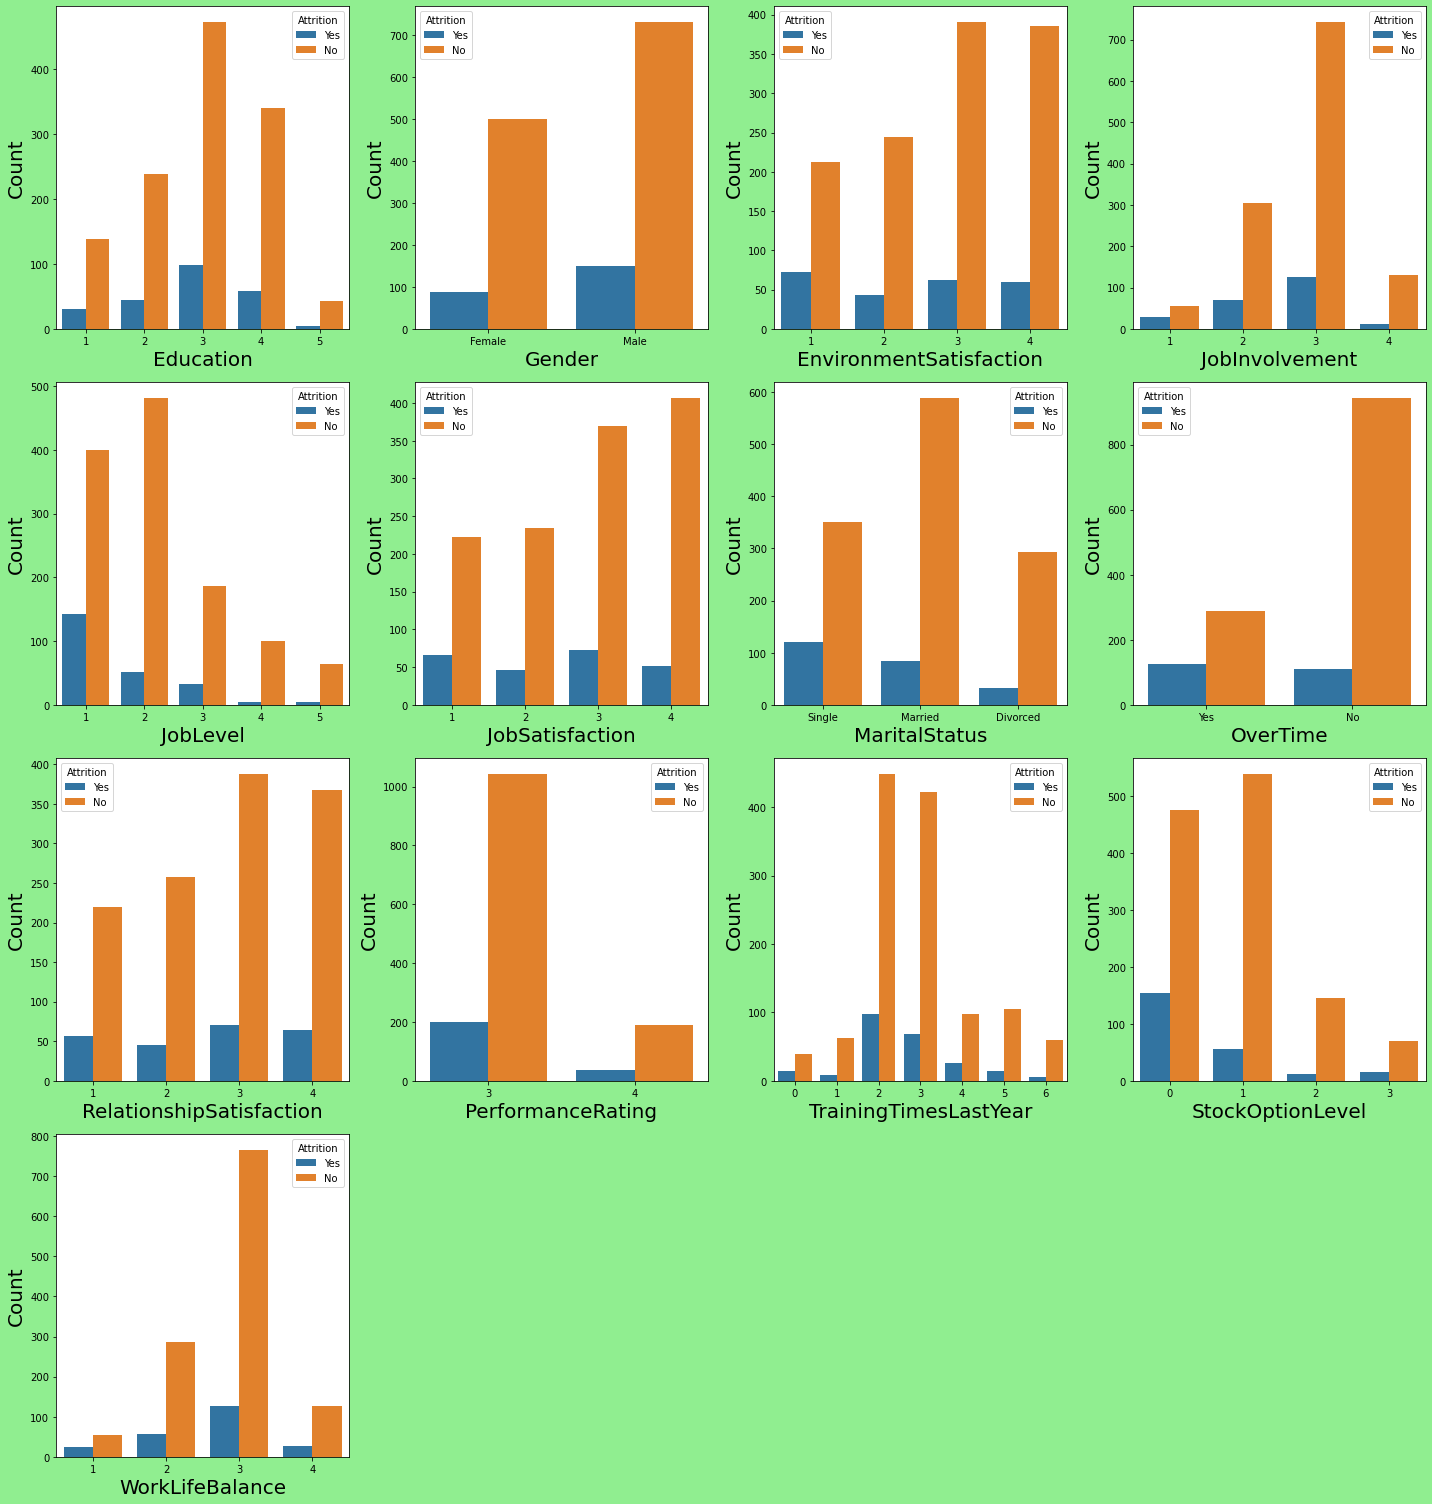

In [158]:
#'Attrition' vs Categorical Data Columns
plt.figure(figsize=(20,21),facecolor='lightgreen')
plotnum=1
X = df[['Education','Gender','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','MaritalStatus','OverTime','RelationshipSatisfaction','PerformanceRating','TrainingTimesLastYear','StockOptionLevel','WorkLifeBalance']]
y = df['Attrition']
for col in X:
    if plotnum<=25:
        plt.subplot(4,4,plotnum)
        sns.countplot(X[col],hue =y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnum+=1
plt.tight_layout()

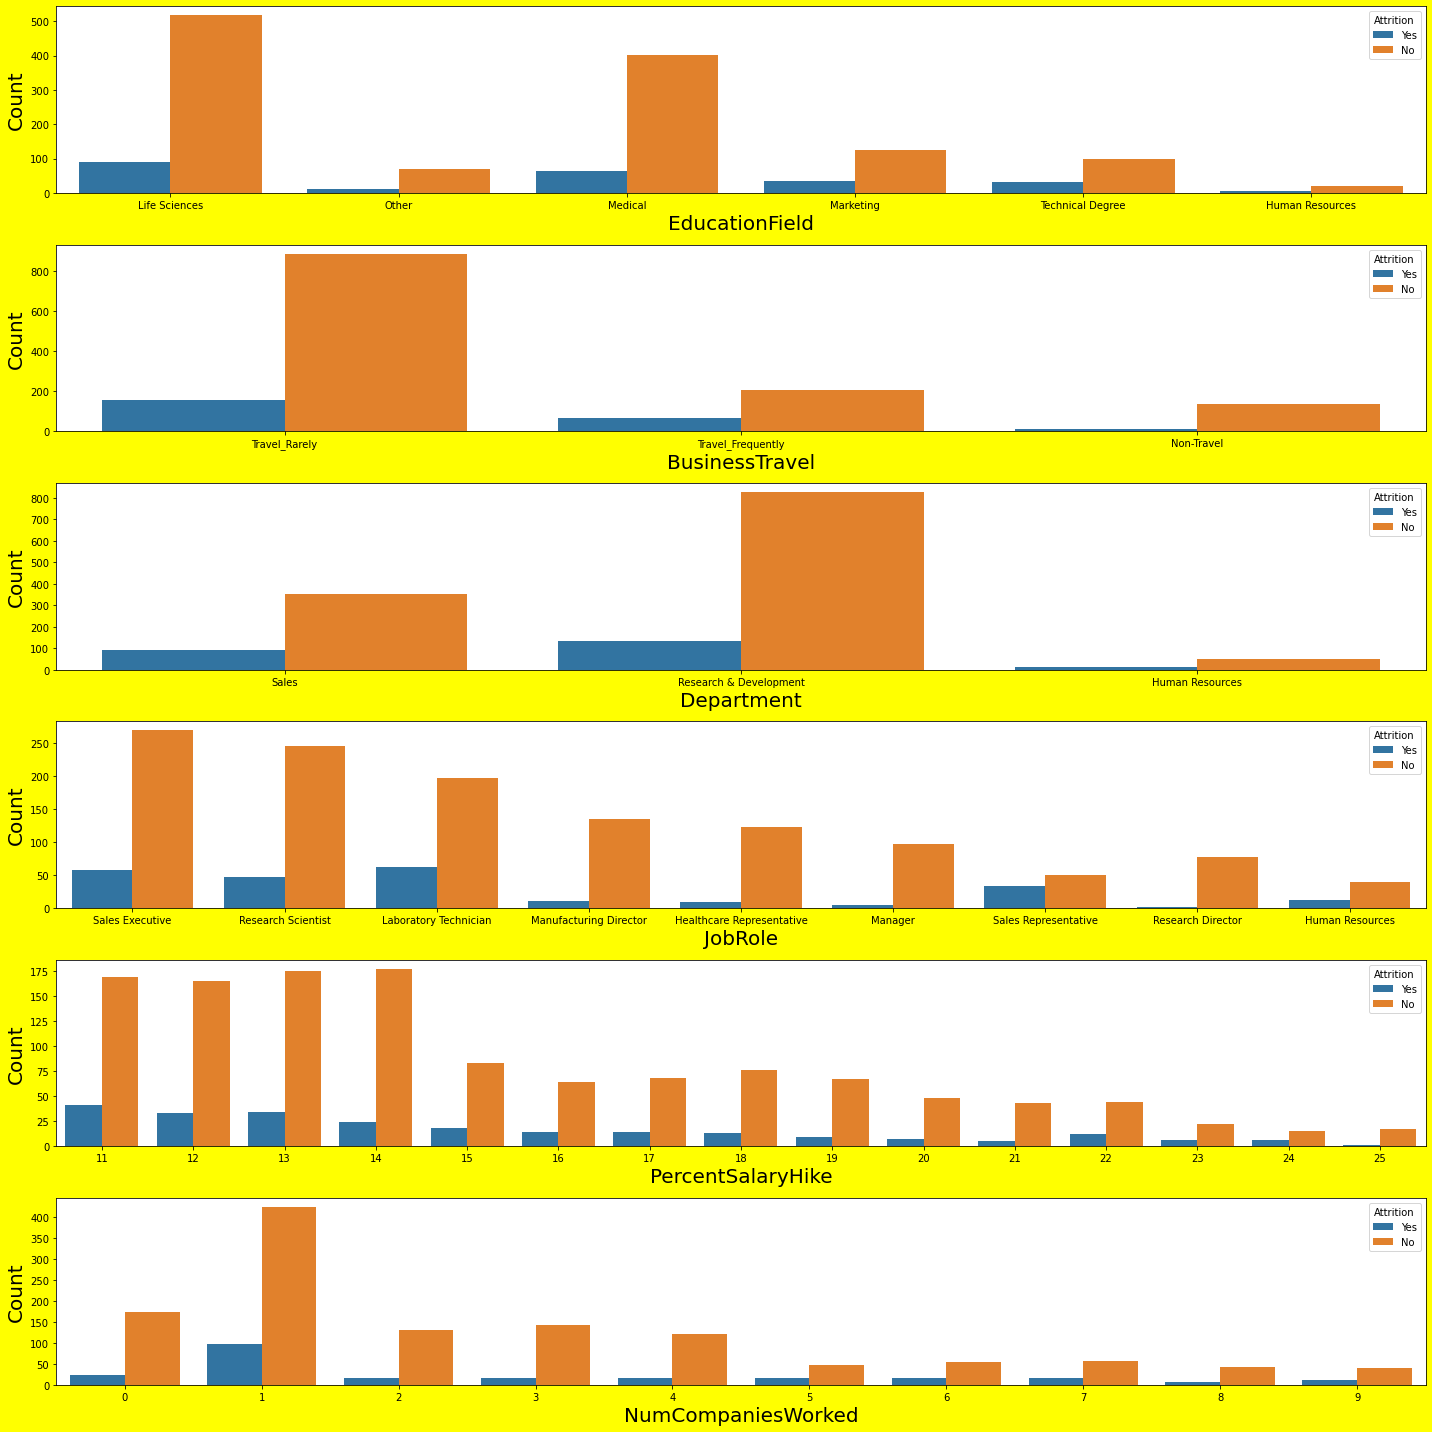

In [159]:
#interpreting Relationship between Dependent Variable and Independent Variables
plt.figure(figsize=(20,20),facecolor='yellow')
plotnum=1
X = df[['EducationField','BusinessTravel','Department','JobRole','PercentSalaryHike','NumCompaniesWorked']]
y = df['Attrition']
for col in X:
    if plotnum<=23:
        plt.subplot(6,1,plotnum)
        sns.countplot(X[col],hue =y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnum+=1
plt.tight_layout()

# Statistical summary of the Dataset


In [160]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Correlation analysis

In [161]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


<AxesSubplot:>

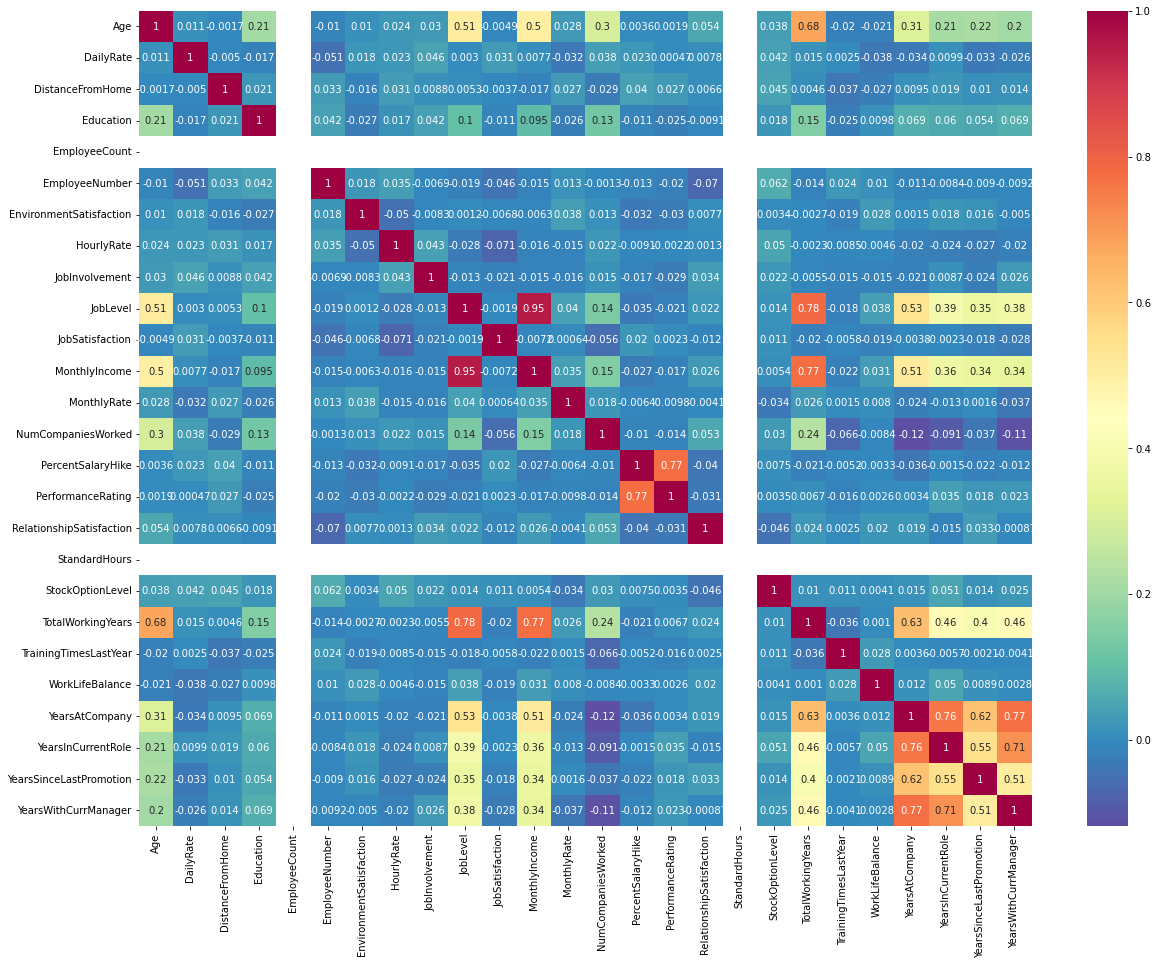

In [162]:
#Showing the heatmap with the correlation
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),cmap='Spectral_r',annot=True)

In [163]:
df.drop(columns = ['EmployeeCount','Over18','StandardHours','EmployeeNumber'],inplace=True)

In [164]:
df.shape

(1470, 31)

# Checking for the Outliers

In [165]:
X = df.drop(columns = ['Attrition'])
y = df['Attrition']

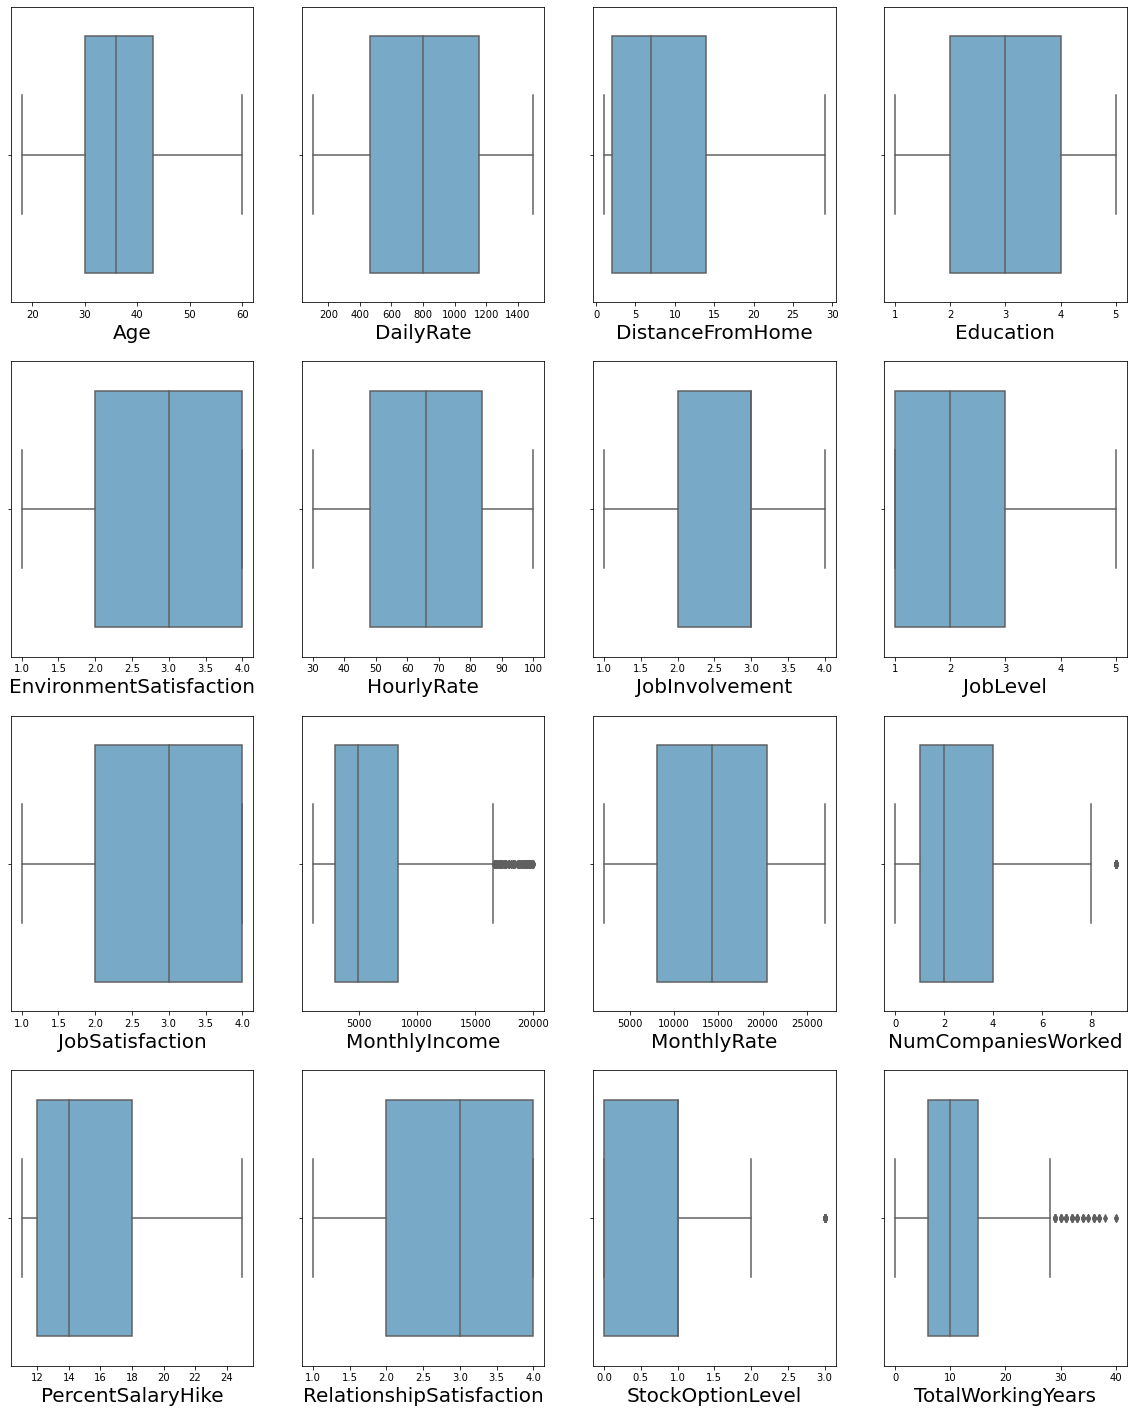

In [166]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in X.drop(columns = ['BusinessTravel','Department','PerformanceRating','EducationField','Gender','JobRole','MaritalStatus','OverTime']):
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col], palette='Blues', orient='v')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

'MonthlyIncome' and 'TotalWorkingYears' have a lot of outliers, and in the Stock option level and NumCompaniesWorked also we have outliers



# Removing Outliers using Z score Method

In [167]:
df1 = X.drop(columns = ['BusinessTravel','Department','PerformanceRating','EducationField','Gender','JobRole','MaritalStatus','OverTime']).copy()

In [168]:
df1

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,11,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,23,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,15,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,11,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,12,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,17,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,15,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,20,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,14,4,0,17,3,2,9,6,0,8


In [169]:
from scipy.stats import zscore
zscor = zscore(df1)
z_score_abs = np.abs(zscor)

df2 = df1[(z_score_abs < 3).all(axis=1)] #taking 3 as threshold value

In [170]:
df2.shape

(1387, 22)

In [171]:
df1.shape

(1470, 22)

In [172]:
# Let's check the the data loss
data_loss = (1470-1387)/1470*100
data_loss

5.646258503401361

# Skewness in Data

In [173]:
X.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

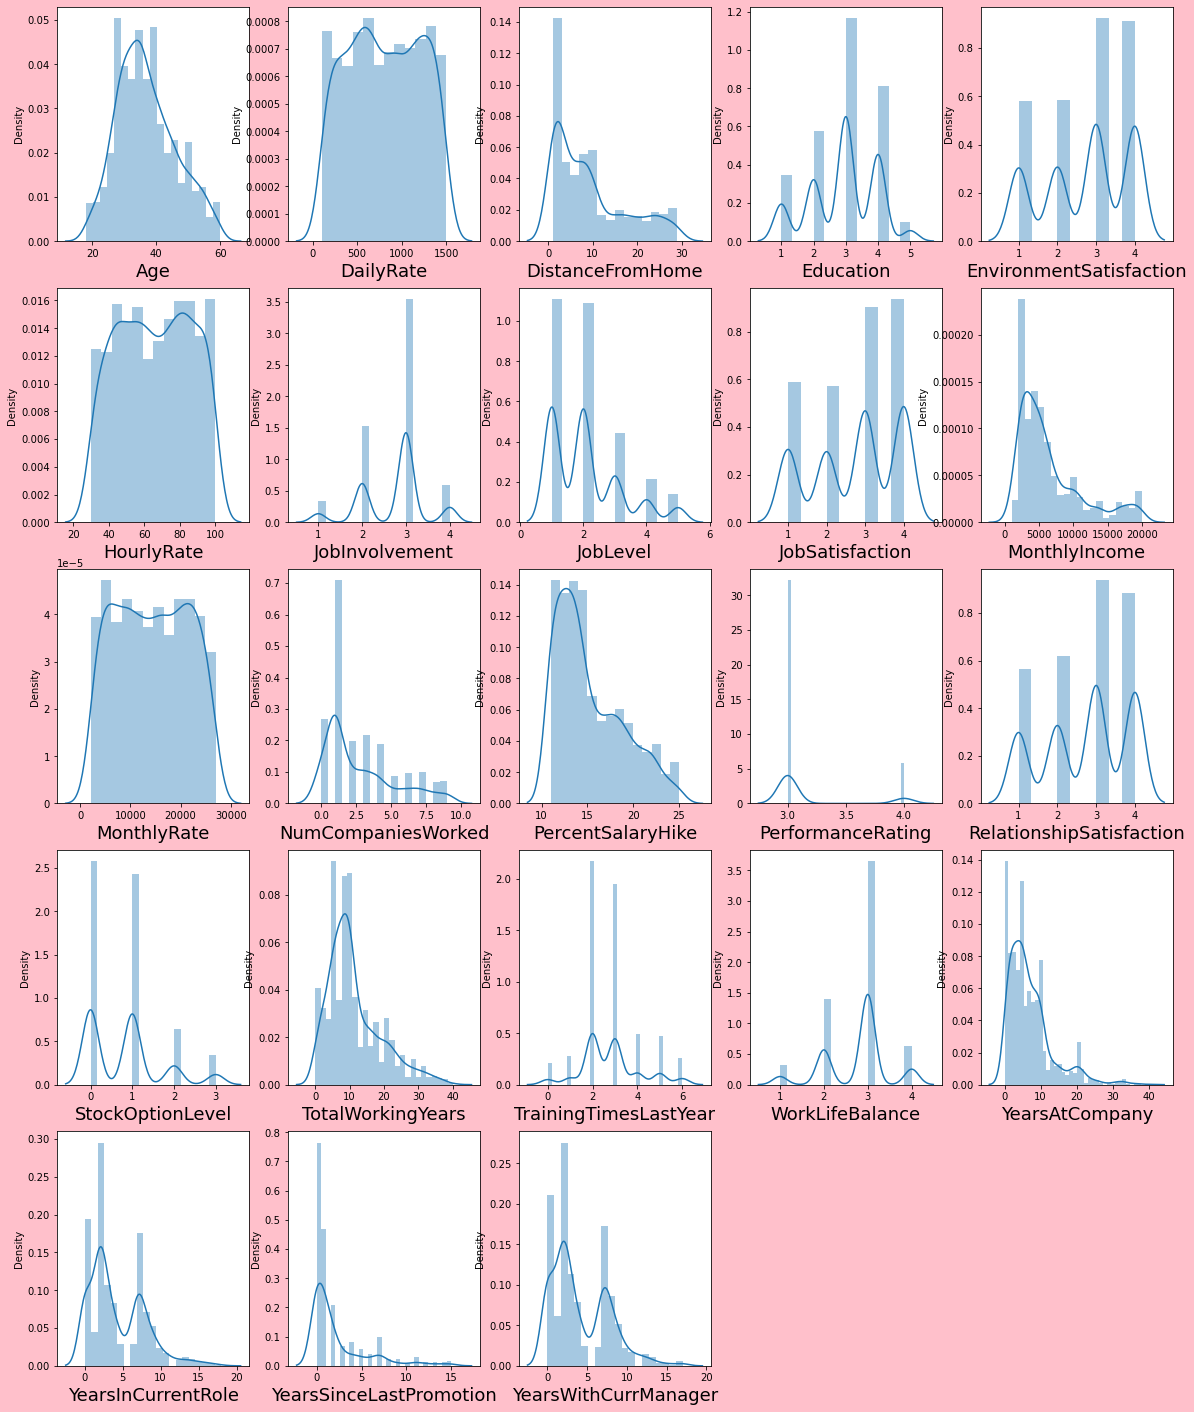

In [174]:
plt.figure(figsize=(20,25),facecolor='pink')
graph=1
for col in X.drop(columns = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']):
    if plotnum<=40:
        plt.subplot(5,5,graph)
        sns.distplot(X[col])
        plt.xlabel(col,fontsize=18)
    graph+=1
plt.show()


Considerable skewness exists in DistanceFromHome, MonthlyIncome, TotalWorkingYears, YearsatCompany,PercentSalaryHike,YearsWithCurrManager,YearsInCurrentRole

In [175]:
from sklearn.preprocessing import PowerTransformer
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)
df4 = X[['DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany','PercentSalaryHike','YearsWithCurrManager','YearsInCurrentRole']]
transformed= powtrans.fit_transform(df4)
transformed = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe

In [176]:
transformed.skew()

DistanceFromHome       -0.007468
MonthlyIncome           0.000000
TotalWorkingYears      -0.010653
YearsAtCompany         -0.008683
PercentSalaryHike       0.116250
YearsWithCurrManager   -0.067565
YearsInCurrentRole     -0.060849
dtype: float64

In [177]:
transformed.index = X.index
X[['DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany','PercentSalaryHike','YearsWithCurrManager','YearsInCurrentRole']] = transformed[['DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany','PercentSalaryHike','YearsWithCurrManager','YearsInCurrentRole']]
X.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome           -0.007468
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               0.000000
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.116250
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears          -0.010653
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany             -0.008683
YearsInCurrentRole         -0.060849
YearsSinceLastPromotion     1.984290
YearsWithCurrManager       -0.067565
dtype: float64

In [178]:
#Encoding the categorical Feature Columns.
X[['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']].nunique()

BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
OverTime          2
dtype: int64

In [179]:
dumm = pd.get_dummies(X[['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']],drop_first = False)

In [180]:
dumm

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1466,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1467,0,0,1,0,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,1
1468,0,1,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
